In [2]:
from sympy import *
import numpy as np
init_printing()

Symbols
----

In [3]:
H, Hx, Hy, Hz = symbols('H, H_x, H_y, H_z')
E, Ex, Ey, Ez = symbols('E, E_x, E_y, E_z')
k, kx, ky, kz = symbols('k, k_x, k_y, k_z')
c, w, Eps_par, Eps_per = symbols('c, \omega, \epsilon_\parallel, \epsilon_\perp')

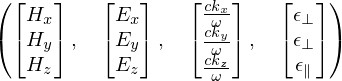

In [4]:
H = Matrix([
        Hx,
        Hy,
        Hz
    ])
E = Matrix([
        Ex,
        Ey,
        Ez
    ])
k = Matrix([
        kx,
        ky,
        kz
    ])
q = (c/w)*k
Eps = Matrix([
        Eps_per,
        Eps_per,
        Eps_par
    ])
H, E, q, Eps

Maxwell Equations
--

In [5]:
rotE = Eq(q.cross(E), H)

In [6]:
rotH = Eq(q.cross(H), E.multiply_elementwise(Eps))

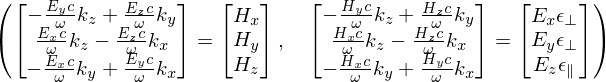

In [7]:
rotE, rotH

Simple
---
$k_y = 0$


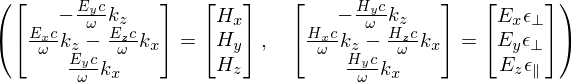

In [8]:
rotE.subs({ky:0}), rotH.subs({ky:0})

Ordinary Wave
---
$E_x = 0$

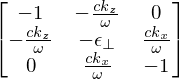

In [9]:
MaxwellMatrix = Matrix([
        [-1, -q[2], 0],
        [-q[2], -Eps_per, q[0]],
        [0, q[0], -1]
])
MaxwellMatrix

In [10]:
Sol = solve(Eq(MaxwellMatrix.det(), 0), Eps_per)[0]

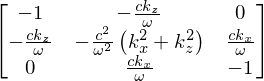

In [11]:
MaxwellMatrix = MaxwellMatrix.subs({Eps_per:Sol})
MaxwellMatrix

In [12]:
FieldVars = Matrix([
        Hx,
        Ey,
        Hz
    ])

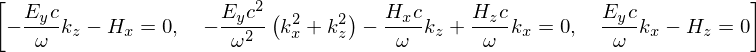

In [13]:
equations = [Eq(MaxwellMatrix.dot(FieldVars)[0], 0),
             Eq(MaxwellMatrix.dot(FieldVars)[1], 0),
             Eq(MaxwellMatrix.dot(FieldVars)[2], 0)
             ]
equations

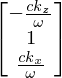

In [14]:
Solution = solve([equations[0], equations[2]], [Hx, Hz])
OrdinaryPolarization = (Matrix([
        Solution[Hx],
        Ey,
        Solution[Hz] 
    ]))/Ey
OrdinaryPolarization

Extraordinary Wave
---
$E_y = 0$

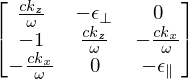

In [15]:
MaxwellMatrix = Matrix([
        [q[2], -Eps_per, 0],
        [-1, q[2], -q[0]],
        [-q[0], 0, -Eps_par]
])
MaxwellMatrix

In [16]:
Sol_per = solve(Eq(MaxwellMatrix.det(), 0), Eps_per)[0]
Sol_par = solve(Eq(MaxwellMatrix.det(), 0), Eps_par)[0]

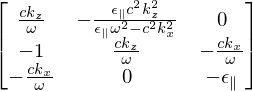

In [17]:
MaxwellMatrix = MaxwellMatrix.subs({Eps_per:Sol_per})
MaxwellMatrix

In [18]:
FieldVars = Matrix([
        Hy,
        Ex,
        Ez
    ])

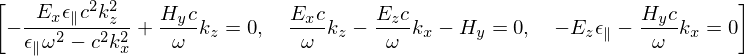

In [19]:
equations = [Eq(MaxwellMatrix.dot(FieldVars)[0], 0),
             Eq(MaxwellMatrix.dot(FieldVars)[1], 0),
             Eq(MaxwellMatrix.dot(FieldVars)[2], 0)
             ]
equations

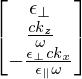

In [20]:
Solution = solve([equations[0], equations[2]], [Ex, Ez])
ExtraordinaryPolarization = simplify(Matrix([
            Hy,
            Solution[Ex].subs({Eps_par:Sol_par}),
            Solution[Ez] 
    ])*Eps_per/Hy)
ExtraordinaryPolarization

Eigenmodes
--

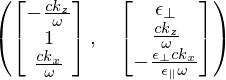

In [21]:
OrdinaryPolarization, ExtraordinaryPolarization

General Solution
---

In [22]:
rotE = q.cross(E) - H
rotH = q.cross(H) - E.multiply_elementwise(Eps)
c1, c2, c3, c4, c5, c6 = symbols('c1, c2, c3, c4, c5, c6', cls=Wild)
#C = Matrix([c1, c2, c3, c4, c5, c6])
#C.match
rotE = [rot.match(c1*Ex + c2*Ey + c3*Ez + c4*Hx + c5*Hy + c6*Hz) for rot in rotE]
rotH = [rot.match(c1*Ex + c2*Ey + c3*Ez + c4*Hx + c5*Hy + c6*Hz) for rot in rotH]
#
MaxwellMatrix = zeros(6)
MaxwellMatrix[0,0]=rotH[0][c1]
MaxwellMatrix[0,1]=rotH[0][c2]
MaxwellMatrix[0,2]=rotH[0][c3]
MaxwellMatrix[0,3]=rotH[0][c4]
MaxwellMatrix[0,4]=rotH[0][c5]
MaxwellMatrix[0,5]=rotH[0][c6]
#
MaxwellMatrix[1,0]=rotH[1][c1]
MaxwellMatrix[1,1]=rotH[1][c2]
MaxwellMatrix[1,2]=rotH[1][c3]
MaxwellMatrix[1,3]=rotH[1][c4]
MaxwellMatrix[1,4]=rotH[1][c5]
MaxwellMatrix[1,5]=rotH[1][c6]
#
MaxwellMatrix[2,0]=rotH[2][c1]
MaxwellMatrix[2,1]=rotH[2][c2]
MaxwellMatrix[2,2]=rotH[2][c3]
MaxwellMatrix[2,3]=rotH[2][c4]
MaxwellMatrix[2,4]=rotH[2][c5]
MaxwellMatrix[2,5]=rotH[2][c6]
#
#
MaxwellMatrix[3,0]=rotE[0][c1]
MaxwellMatrix[3,1]=rotE[0][c2]
MaxwellMatrix[3,2]=rotE[0][c3]
MaxwellMatrix[3,3]=rotE[0][c4]
MaxwellMatrix[3,4]=rotE[0][c5]
MaxwellMatrix[3,5]=rotE[0][c6]
#
MaxwellMatrix[4,0]=rotE[1][c1]
MaxwellMatrix[4,1]=rotE[1][c2]
MaxwellMatrix[4,2]=rotE[1][c3]
MaxwellMatrix[4,3]=rotE[1][c4]
MaxwellMatrix[4,4]=rotE[1][c5]
MaxwellMatrix[4,5]=rotE[1][c6]
#
MaxwellMatrix[5,0]=rotE[2][c1]
MaxwellMatrix[5,1]=rotE[2][c2]
MaxwellMatrix[5,2]=rotE[2][c3]
MaxwellMatrix[5,3]=rotE[2][c4]
MaxwellMatrix[5,4]=rotE[2][c5]
MaxwellMatrix[5,5]=rotE[2][c6]

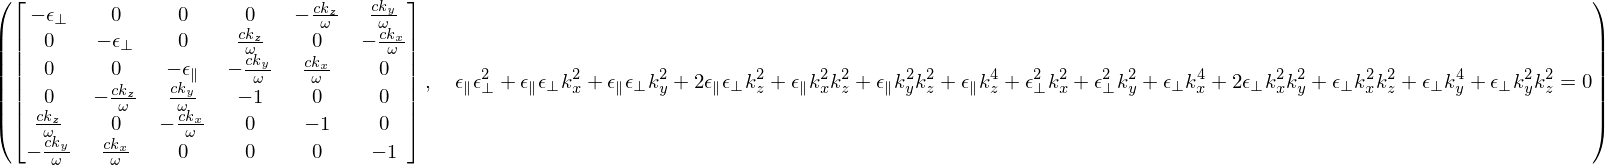

In [35]:
MaxwellMatrix, Eq(MaxwellMatrix.det().subs({c:1, w:1}), 0)

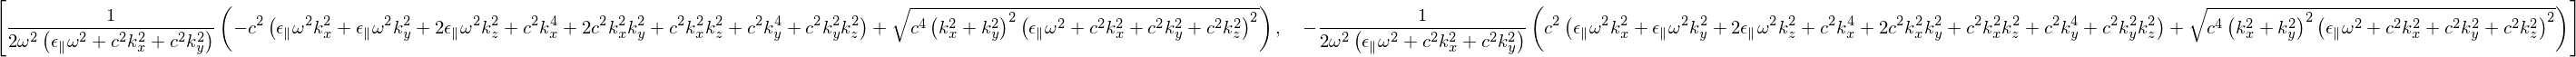

In [33]:
solve(Eq(MaxwellMatrix.det(), 0), Eps_per)

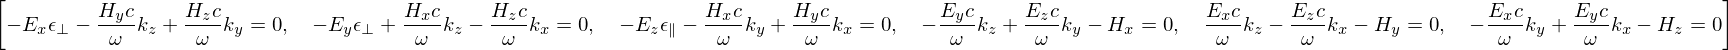

In [24]:
FieldVars = Matrix([
        Ex,
        Ey,
        Ez,
        Hx,
        Hy,
        Hz
    ])
equations = [Eq(exp,0) for exp in MaxwellMatrix.dot(FieldVars)]
equations

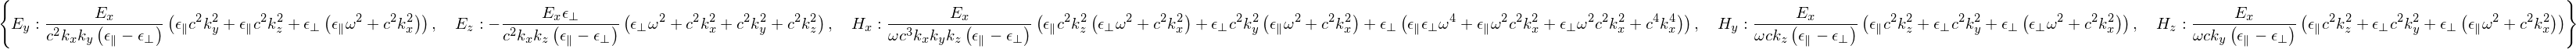

In [27]:
simplify(solve([equations[0],equations[1],equations[2], equations[5], equations[4]], [Ey, Ez, Hx, Hy, Hz]))

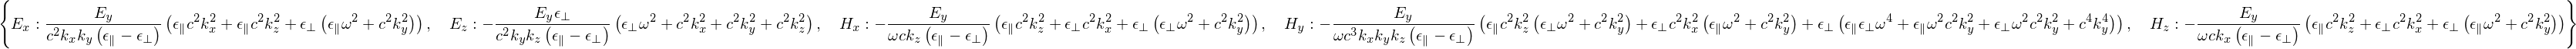

In [32]:
simplify(solve([equations[0],equations[1],equations[2], equations[3], equations[5]], [Ex, Ez, Hx, Hy, Hz]))